In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [6]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/15/21', '3/16/21', '3/17/21', '3/18/21', '3/19/21', '3/20/21',
       '3/21/21', '3/22/21', '3/23/21', '3/24/21'],
      dtype='object', length=432)

In [7]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [8]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [9]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [10]:
days_since_1_1 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-30]
print(future_forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [12]:
start = '1/12/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [13]:
def prediction(x):
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, x, test_size=0.2, shuffle=False)
    # transform data for polynomial regression
    poly = PolynomialFeatures(degree=2)
    poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
    poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
    poly_future_forecast = poly.fit_transform(future_forecast)

    # polynomial regression
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
    test_linear_pred = linear_model.predict(poly_X_test_confirmed)
    global linear_pred
    linear_pred = linear_model.predict(poly_future_forecast)
    print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
    print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

    plt.plot(y_test_confirmed)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data', 'Polynomial Regression Predictions'])
    print(linear_model.score(poly_X_test_confirmed,y_test_confirmed))

    linear_pred = linear_pred.reshape(1,-1)[0]
    poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-20:])})
    print(poly_df)
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

# Cases Prediction

MAE: 4468997.331641708
MSE: 24046967636168.492
0.8289173682878512
          Date  Predicted number of Confirmed Cases
0   03/25/2021                          138711263.0
1   03/26/2021                          139439959.0
2   03/27/2021                          140170563.0
3   03/28/2021                          140903075.0
4   03/29/2021                          141637495.0
5   03/30/2021                          142373823.0
6   03/31/2021                          143112059.0
7   04/01/2021                          143852204.0
8   04/02/2021                          144594257.0
9   04/03/2021                          145338217.0
10  04/04/2021                          146084086.0
11  04/05/2021                          146831864.0
12  04/06/2021                          147581549.0
13  04/07/2021                          148333142.0
14  04/08/2021                          149086644.0
15  04/09/2021                          149842054.0
16  04/10/2021                          150599372.

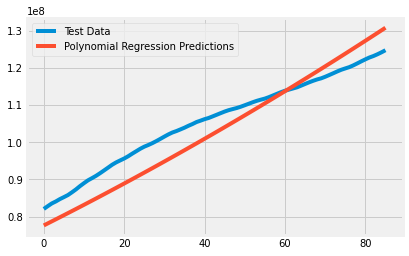

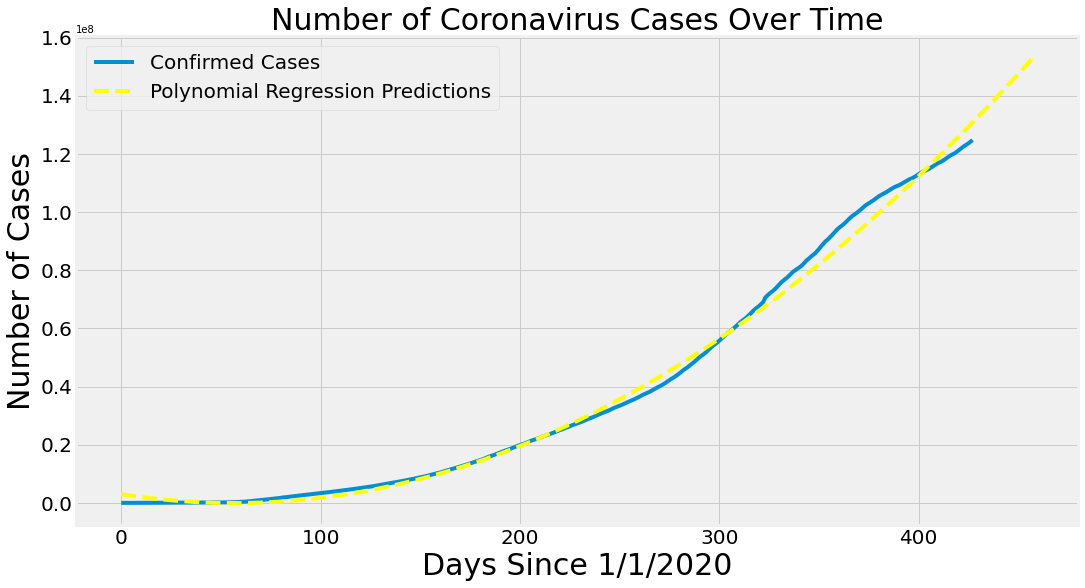

In [14]:
prediction(world_cases)
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 5240181.556940045
MSE: 32039172473748.098
-218.11696971378922
          Date  Predicted number of Confirmed Cases
0   03/25/2021                           21911481.0
1   03/26/2021                           22029843.0
2   03/27/2021                           22148520.0
3   03/28/2021                           22267512.0
4   03/29/2021                           22386819.0
5   03/30/2021                           22506440.0
6   03/31/2021                           22626375.0
7   04/01/2021                           22746625.0
8   04/02/2021                           22867190.0
9   04/03/2021                           22988069.0
10  04/04/2021                           23109263.0
11  04/05/2021                           23230772.0
12  04/06/2021                           23352595.0
13  04/07/2021                           23474733.0
14  04/08/2021                           23597185.0
15  04/09/2021                           23719952.0
16  04/10/2021                           23843034

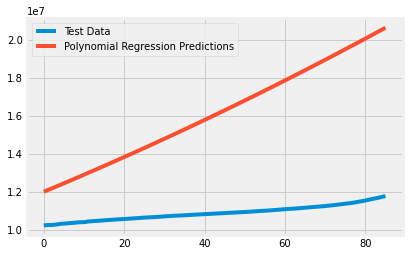

In [15]:
prediction(india_cases)

MAE: 4272212.153643033
MSE: 19258879296055.5
-1.217976951096622
          Date  Predicted number of Confirmed Cases
0   03/25/2021                           29542813.0
1   03/26/2021                           29694525.0
2   03/27/2021                           29846628.0
3   03/28/2021                           29999121.0
4   03/29/2021                           30152004.0
5   03/30/2021                           30305278.0
6   03/31/2021                           30458941.0
7   04/01/2021                           30612996.0
8   04/02/2021                           30767440.0
9   04/03/2021                           30922275.0
10  04/04/2021                           31077500.0
11  04/05/2021                           31233115.0
12  04/06/2021                           31389121.0
13  04/07/2021                           31545517.0
14  04/08/2021                           31702303.0
15  04/09/2021                           31859479.0
16  04/10/2021                           32017046.0


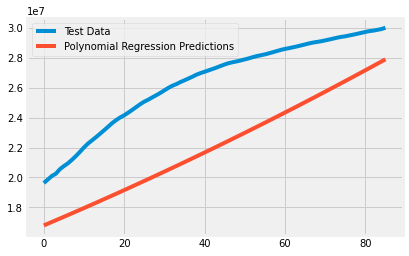

In [16]:
prediction(us_cases)

MAE: 24369.018315994028
MSE: 658590737.2505374
-197.54351554509506
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              59653.0
1   03/26/2021                              59303.0
2   03/27/2021                              58952.0
3   03/28/2021                              58599.0
4   03/29/2021                              58244.0
5   03/30/2021                              57888.0
6   03/31/2021                              57530.0
7   04/01/2021                              57170.0
8   04/02/2021                              56808.0
9   04/03/2021                              56445.0
10  04/04/2021                              56080.0
11  04/05/2021                              55713.0
12  04/06/2021                              55344.0
13  04/07/2021                              54974.0
14  04/08/2021                              54602.0
15  04/09/2021                              54228.0
16  04/10/2021                              53853

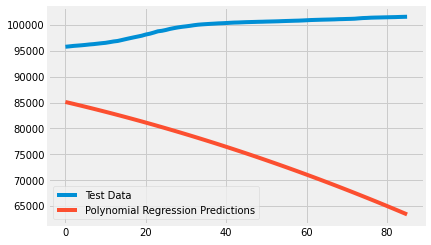

In [17]:
prediction(china_cases)

MAE: 184643.78010785737
MSE: 50146465385.97282
0.8040163140848069
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            5105030.0
1   03/26/2021                            5135541.0
2   03/27/2021                            5166143.0
3   03/28/2021                            5196833.0
4   03/29/2021                            5227613.0
5   03/30/2021                            5258483.0
6   03/31/2021                            5289441.0
7   04/01/2021                            5320489.0
8   04/02/2021                            5351627.0
9   04/03/2021                            5382853.0
10  04/04/2021                            5414169.0
11  04/05/2021                            5445575.0
12  04/06/2021                            5477070.0
13  04/07/2021                            5508654.0
14  04/08/2021                            5540328.0
15  04/09/2021                            5572090.0
16  04/10/2021                            5603943.

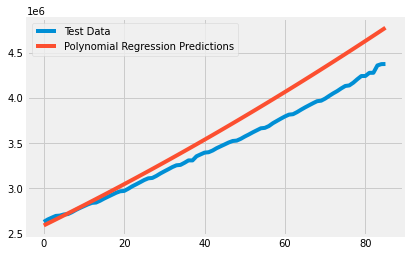

In [18]:
prediction(france_cases)

MAE: 538351.3649177399
MSE: 293245947064.4791
-3.1358504559851923
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            2399423.0
1   03/26/2021                            2413232.0
2   03/27/2021                            2427081.0
3   03/28/2021                            2440970.0
4   03/29/2021                            2454899.0
5   03/30/2021                            2468867.0
6   03/31/2021                            2482876.0
7   04/01/2021                            2496924.0
8   04/02/2021                            2511011.0
9   04/03/2021                            2525139.0
10  04/04/2021                            2539306.0
11  04/05/2021                            2553514.0
12  04/06/2021                            2567761.0
13  04/07/2021                            2582047.0
14  04/08/2021                            2596374.0
15  04/09/2021                            2610740.0
16  04/10/2021                            2625146.

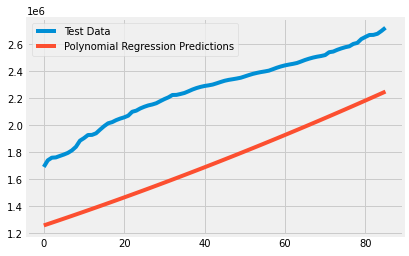

In [19]:
prediction(germany_cases)

MAE: 1180102.8112604988
MSE: 1447352232000.3406
-3.9494697769172946
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            3591833.0
1   03/26/2021                            3612309.0
2   03/27/2021                            3632842.0
3   03/28/2021                            3653434.0
4   03/29/2021                            3674084.0
5   03/30/2021                            3694792.0
6   03/31/2021                            3715558.0
7   04/01/2021                            3736383.0
8   04/02/2021                            3757265.0
9   04/03/2021                            3778206.0
10  04/04/2021                            3799205.0
11  04/05/2021                            3820262.0
12  04/06/2021                            3841377.0
13  04/07/2021                            3862550.0
14  04/08/2021                            3883782.0
15  04/09/2021                            3905071.0
16  04/10/2021                            392641

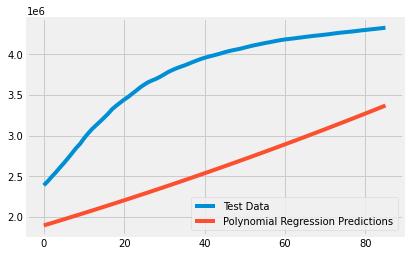

In [20]:
prediction(uk_cases)

MAE: 234161.97479767713
MSE: 85116770583.80222
0.5993737659155596
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            3460607.0
1   03/26/2021                            3479322.0
2   03/27/2021                            3498087.0
3   03/28/2021                            3516904.0
4   03/29/2021                            3535771.0
5   03/30/2021                            3554689.0
6   03/31/2021                            3573658.0
7   04/01/2021                            3592678.0
8   04/02/2021                            3611749.0
9   04/03/2021                            3630871.0
10  04/04/2021                            3650043.0
11  04/05/2021                            3669266.0
12  04/06/2021                            3688541.0
13  04/07/2021                            3707866.0
14  04/08/2021                            3727241.0
15  04/09/2021                            3746668.0
16  04/10/2021                            3766146.

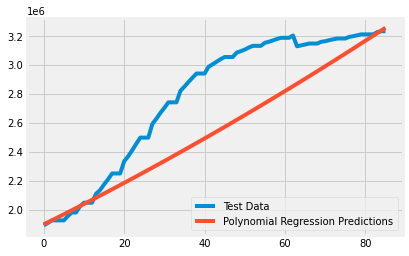

In [21]:
prediction(spain_cases)

MAE: 397990.63447898824
MSE: 173179450013.97244
-0.11407934693841981
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            4585068.0
1   03/26/2021                            4607350.0
2   03/27/2021                            4629687.0
3   03/28/2021                            4652079.0
4   03/29/2021                            4674524.0
5   03/30/2021                            4697023.0
6   03/31/2021                            4719577.0
7   04/01/2021                            4742184.0
8   04/02/2021                            4764846.0
9   04/03/2021                            4787562.0
10  04/04/2021                            4810332.0
11  04/05/2021                            4833157.0
12  04/06/2021                            4856035.0
13  04/07/2021                            4878968.0
14  04/08/2021                            4901954.0
15  04/09/2021                            4924995.0
16  04/10/2021                            49480

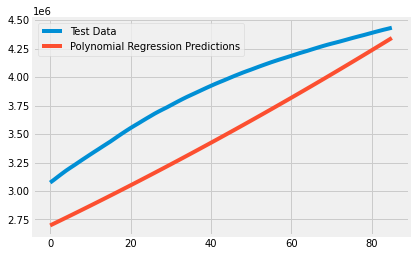

In [22]:
prediction(russia_cases)

MAE: 331550.15738917
MSE: 112322197520.49825
0.19160284090565538
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            3309563.0
1   03/26/2021                            3329071.0
2   03/27/2021                            3348635.0
3   03/28/2021                            3368257.0
4   03/29/2021                            3387936.0
5   03/30/2021                            3407672.0
6   03/31/2021                            3427465.0
7   04/01/2021                            3447316.0
8   04/02/2021                            3467224.0
9   04/03/2021                            3487189.0
10  04/04/2021                            3507211.0
11  04/05/2021                            3527290.0
12  04/06/2021                            3547427.0
13  04/07/2021                            3567620.0
14  04/08/2021                            3587871.0
15  04/09/2021                            3608179.0
16  04/10/2021                            3628544.0

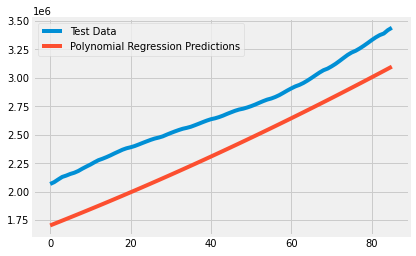

In [23]:
prediction(italy_cases)

# Recoveries Prediction

MAE: 5688589.243118097
MSE: 40124829062635.58
0.1957896745889972
          Date  Predicted number of Confirmed Cases
0   03/25/2021                           87115739.0
1   03/26/2021                           87570760.0
2   03/27/2021                           88026959.0
3   03/28/2021                           88484337.0
4   03/29/2021                           88942893.0
5   03/30/2021                           89402627.0
6   03/31/2021                           89863539.0
7   04/01/2021                           90325630.0
8   04/02/2021                           90788899.0
9   04/03/2021                           91253346.0
10  04/04/2021                           91718972.0
11  04/05/2021                           92185775.0
12  04/06/2021                           92653757.0
13  04/07/2021                           93122918.0
14  04/08/2021                           93593256.0
15  04/09/2021                           94064773.0
16  04/10/2021                           94537468.0

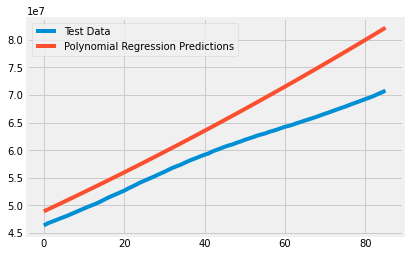

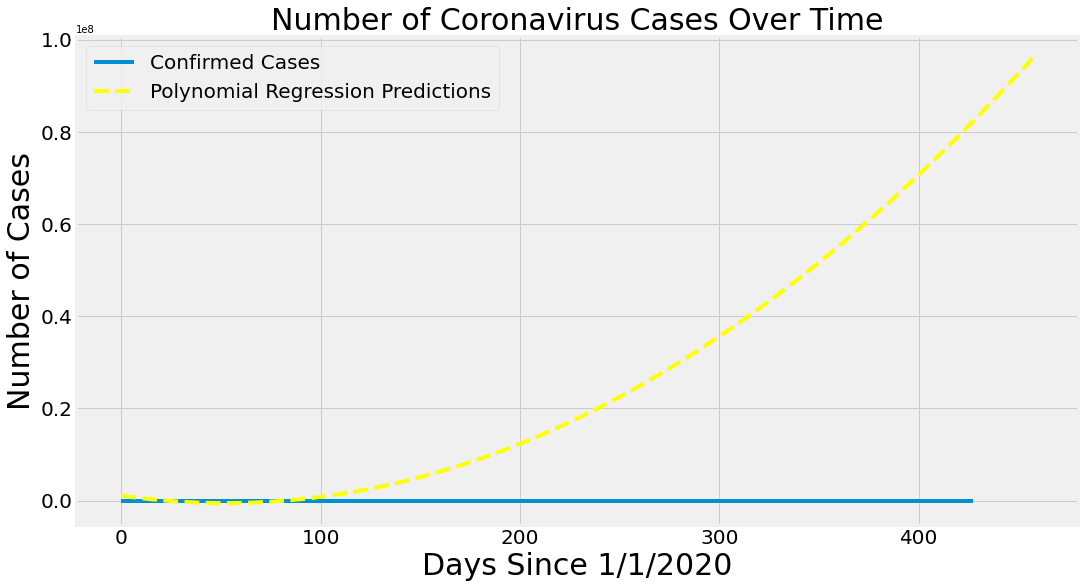

In [24]:
prediction(total_recovered)
plot_predictions(adjusted_dates, recovery_rate, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 4869737.275104075
MSE: 28391818086760.86
-206.1593720264402
          Date  Predicted number of Confirmed Cases
0   03/25/2021                           21234290.0
1   03/26/2021                           21354029.0
2   03/27/2021                           21474097.0
3   03/28/2021                           21594497.0
4   03/29/2021                           21715228.0
5   03/30/2021                           21836289.0
6   03/31/2021                           21957681.0
7   04/01/2021                           22079403.0
8   04/02/2021                           22201457.0
9   04/03/2021                           22323841.0
10  04/04/2021                           22446556.0
11  04/05/2021                           22569602.0
12  04/06/2021                           22692979.0
13  04/07/2021                           22816686.0
14  04/08/2021                           22940724.0
15  04/09/2021                           23065093.0
16  04/10/2021                           23189792.0

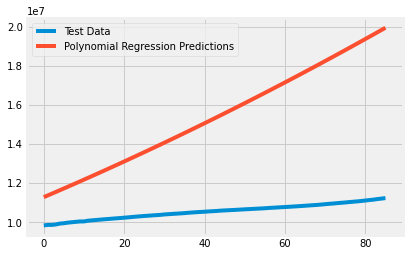

In [25]:
prediction(india_recoveries)

MAE: 4752.326806007699
MSE: 24980526.486561753
-4.686977300664177
          Date  Predicted number of Confirmed Cases
0   03/25/2021                               6437.0
1   03/26/2021                               6464.0
2   03/27/2021                               6490.0
3   03/28/2021                               6516.0
4   03/29/2021                               6543.0
5   03/30/2021                               6569.0
6   03/31/2021                               6596.0
7   04/01/2021                               6623.0
8   04/02/2021                               6649.0
9   04/03/2021                               6676.0
10  04/04/2021                               6703.0
11  04/05/2021                               6730.0
12  04/06/2021                               6757.0
13  04/07/2021                               6784.0
14  04/08/2021                               6811.0
15  04/09/2021                               6838.0
16  04/10/2021                               6865.

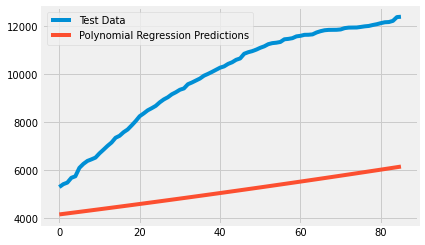

In [26]:
prediction(uk_recoveries)

MAE: 4881228.020063844
MSE: 24079378097790.832
0.0
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            6002143.0
1   03/26/2021                            6024185.0
2   03/27/2021                            6046260.0
3   03/28/2021                            6068368.0
4   03/29/2021                            6090509.0
5   03/30/2021                            6112683.0
6   03/31/2021                            6134891.0
7   04/01/2021                            6157131.0
8   04/02/2021                            6179404.0
9   04/03/2021                            6201710.0
10  04/04/2021                            6224050.0
11  04/05/2021                            6246422.0
12  04/06/2021                            6268828.0
13  04/07/2021                            6291266.0
14  04/08/2021                            6313737.0
15  04/09/2021                            6336242.0
16  04/10/2021                            6358780.0
17  04/11/202

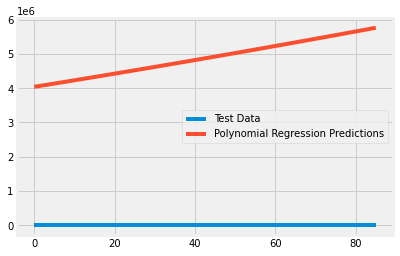

In [27]:
prediction(us_recoveries)

MAE: 59243.60490487851
MSE: 4113500869.188537
0.0
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              30553.0
1   03/26/2021                              29191.0
2   03/27/2021                              27823.0
3   03/28/2021                              26448.0
4   03/29/2021                              25066.0
5   03/30/2021                              23677.0
6   03/31/2021                              22281.0
7   04/01/2021                              20878.0
8   04/02/2021                              19469.0
9   04/03/2021                              18052.0
10  04/04/2021                              16628.0
11  04/05/2021                              15198.0
12  04/06/2021                              13760.0
13  04/07/2021                              12316.0
14  04/08/2021                              10864.0
15  04/09/2021                               9406.0
16  04/10/2021                               7941.0
17  04/11/2021

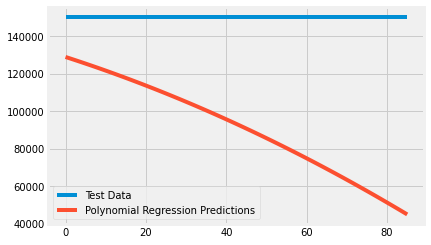

In [28]:
prediction(spain_recoveries)

MAE: 799326.0844939064
MSE: 660589920012.2983
-5.174811623981985
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            1649712.0
1   03/26/2021                            1658807.0
2   03/27/2021                            1667927.0
3   03/28/2021                            1677072.0
4   03/29/2021                            1686243.0
5   03/30/2021                            1695439.0
6   03/31/2021                            1704660.0
7   04/01/2021                            1713907.0
8   04/02/2021                            1723179.0
9   04/03/2021                            1732476.0
10  04/04/2021                            1741798.0
11  04/05/2021                            1751146.0
12  04/06/2021                            1760519.0
13  04/07/2021                            1769917.0
14  04/08/2021                            1779341.0
15  04/09/2021                            1788790.0
16  04/10/2021                            1798264.0

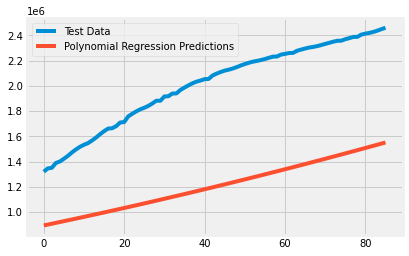

In [29]:
prediction(germany_recoveries)

MAE: 35033.15756934413
MSE: 1314557865.802732
-0.6789838136530313
          Date  Predicted number of Confirmed Cases
0   03/25/2021                             249186.0
1   03/26/2021                             249995.0
2   03/27/2021                             250804.0
3   03/28/2021                             251615.0
4   03/29/2021                             252427.0
5   03/30/2021                             253239.0
6   03/31/2021                             254053.0
7   04/01/2021                             254868.0
8   04/02/2021                             255684.0
9   04/03/2021                             256501.0
10  04/04/2021                             257319.0
11  04/05/2021                             258137.0
12  04/06/2021                             258957.0
13  04/07/2021                             259779.0
14  04/08/2021                             260601.0
15  04/09/2021                             261424.0
16  04/10/2021                             262248.

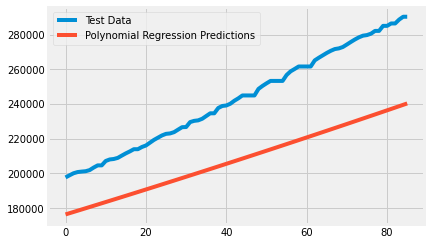

In [30]:
prediction(france_recoveries)

MAE: 857617.1257127122
MSE: 767603099903.3645
-4.172639992170293
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            1744016.0
1   03/26/2021                            1753942.0
2   03/27/2021                            1763896.0
3   03/28/2021                            1773878.0
4   03/29/2021                            1783888.0
5   03/30/2021                            1793927.0
6   03/31/2021                            1803993.0
7   04/01/2021                            1814089.0
8   04/02/2021                            1824212.0
9   04/03/2021                            1834364.0
10  04/04/2021                            1844543.0
11  04/05/2021                            1854752.0
12  04/06/2021                            1864988.0
13  04/07/2021                            1875253.0
14  04/08/2021                            1885546.0
15  04/09/2021                            1895867.0
16  04/10/2021                            1906216.0

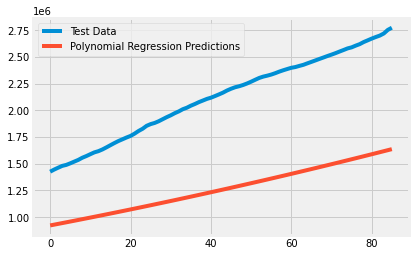

In [31]:
prediction(italy_recoveries)

MAE: 35414.98578338275
MSE: 1420217569.6008394
-285.61948497907537
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              31948.0
1   03/26/2021                              31365.0
2   03/27/2021                              30778.0
3   03/28/2021                              30189.0
4   03/29/2021                              29598.0
5   03/30/2021                              29003.0
6   03/31/2021                              28405.0
7   04/01/2021                              27805.0
8   04/02/2021                              27202.0
9   04/03/2021                              26596.0
10  04/04/2021                              25987.0
11  04/05/2021                              25376.0
12  04/06/2021                              24761.0
13  04/07/2021                              24144.0
14  04/08/2021                              23524.0
15  04/09/2021                              22901.0
16  04/10/2021                              22275

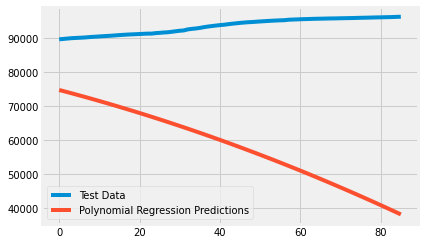

In [32]:
prediction(china_recoveries)

# Deaths Prediction

MAE: 212479.7596452876
MSE: 48782322794.83722
0.3871728250249086
          Date  Predicted number of Confirmed Cases
0   03/25/2021                            2620238.0
1   03/26/2021                            2630566.0
2   03/27/2021                            2640912.0
3   03/28/2021                            2651278.0
4   03/29/2021                            2661663.0
5   03/30/2021                            2672067.0
6   03/31/2021                            2682490.0
7   04/01/2021                            2692932.0
8   04/02/2021                            2703393.0
9   04/03/2021                            2713874.0
10  04/04/2021                            2724373.0
11  04/05/2021                            2734892.0
12  04/06/2021                            2745430.0
13  04/07/2021                            2755987.0
14  04/08/2021                            2766563.0
15  04/09/2021                            2777158.0
16  04/10/2021                            2787772.0

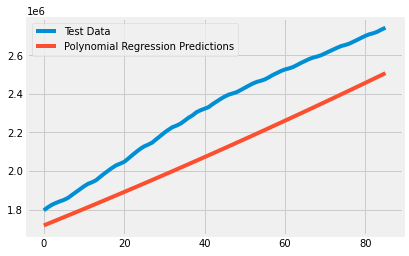

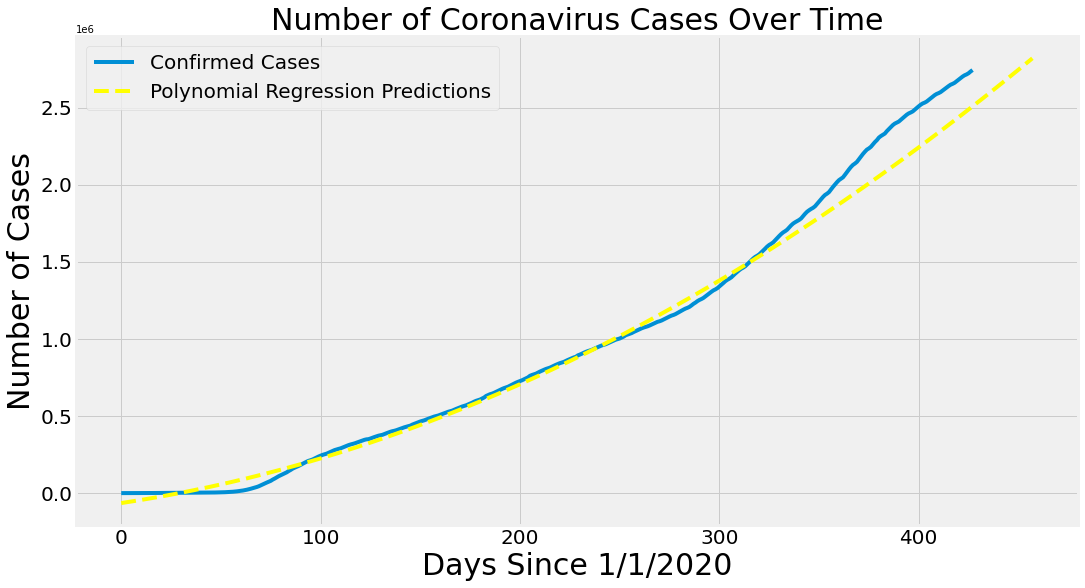

In [33]:
prediction(total_deaths)
plot_predictions(adjusted_dates, total_deaths, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 72872.16611877776
MSE: 6202118505.584497
-629.4050787987727
          Date  Predicted number of Confirmed Cases
0   03/25/2021                             303157.0
1   03/26/2021                             304690.0
2   03/27/2021                             306227.0
3   03/28/2021                             307768.0
4   03/29/2021                             309313.0
5   03/30/2021                             310861.0
6   03/31/2021                             312414.0
7   04/01/2021                             313970.0
8   04/02/2021                             315530.0
9   04/03/2021                             317094.0
10  04/04/2021                             318662.0
11  04/05/2021                             320233.0
12  04/06/2021                             321809.0
13  04/07/2021                             323388.0
14  04/08/2021                             324971.0
15  04/09/2021                             326557.0
16  04/10/2021                             328148.0

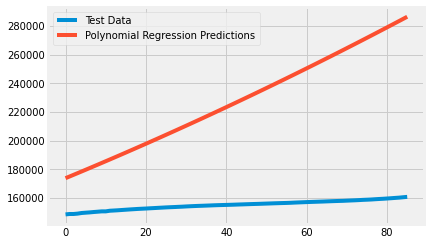

In [34]:
prediction(india_deaths)

MAE: 103977.04549108965
MSE: 11938539575.18929
-2.1431663652527204
          Date  Predicted number of Confirmed Cases
0   03/25/2021                             422623.0
1   03/26/2021                             423829.0
2   03/27/2021                             425036.0
3   03/28/2021                             426244.0
4   03/29/2021                             427452.0
5   03/30/2021                             428662.0
6   03/31/2021                             429872.0
7   04/01/2021                             431083.0
8   04/02/2021                             432294.0
9   04/03/2021                             433507.0
10  04/04/2021                             434721.0
11  04/05/2021                             435935.0
12  04/06/2021                             437150.0
13  04/07/2021                             438366.0
14  04/08/2021                             439583.0
15  04/09/2021                             440801.0
16  04/10/2021                             442019

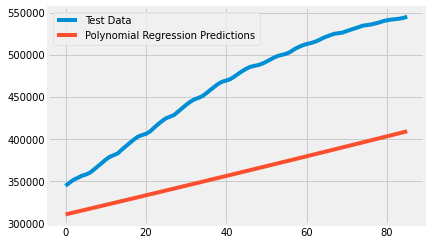

In [35]:
prediction(us_deaths)

MAE: 48286.271928273265
MSE: 2637536315.761908
-7.046048892283837
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              59741.0
1   03/26/2021                              59722.0
2   03/27/2021                              59702.0
3   03/28/2021                              59682.0
4   03/29/2021                              59660.0
5   03/30/2021                              59638.0
6   03/31/2021                              59615.0
7   04/01/2021                              59592.0
8   04/02/2021                              59567.0
9   04/03/2021                              59542.0
10  04/04/2021                              59516.0
11  04/05/2021                              59489.0
12  04/06/2021                              59462.0
13  04/07/2021                              59433.0
14  04/08/2021                              59404.0
15  04/09/2021                              59374.0
16  04/10/2021                              59343.

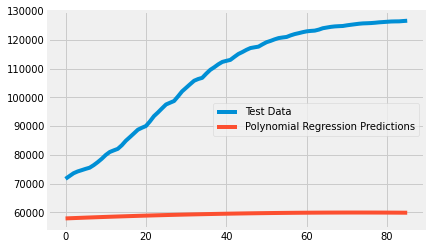

In [36]:
prediction(uk_deaths)

MAE: 17370.390326144
MSE: 354345902.5104635
-4.529198049038575
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              46139.0
1   03/26/2021                              46143.0
2   03/27/2021                              46146.0
3   03/28/2021                              46149.0
4   03/29/2021                              46151.0
5   03/30/2021                              46153.0
6   03/31/2021                              46155.0
7   04/01/2021                              46156.0
8   04/02/2021                              46156.0
9   04/03/2021                              46156.0
10  04/04/2021                              46155.0
11  04/05/2021                              46154.0
12  04/06/2021                              46153.0
13  04/07/2021                              46151.0
14  04/08/2021                              46148.0
15  04/09/2021                              46145.0
16  04/10/2021                              46141.0
1

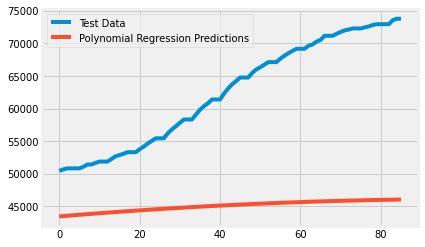

In [37]:
prediction(spain_deaths)

MAE: 36180.67301699734
MSE: 1432296959.2848241
-7.152546230924903
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              28230.0
1   03/26/2021                              28329.0
2   03/27/2021                              28428.0
3   03/28/2021                              28527.0
4   03/29/2021                              28626.0
5   03/30/2021                              28726.0
6   03/31/2021                              28826.0
7   04/01/2021                              28925.0
8   04/02/2021                              29025.0
9   04/03/2021                              29125.0
10  04/04/2021                              29226.0
11  04/05/2021                              29326.0
12  04/06/2021                              29427.0
13  04/07/2021                              29528.0
14  04/08/2021                              29628.0
15  04/09/2021                              29730.0
16  04/10/2021                              29831.

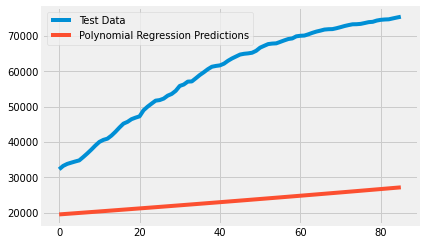

In [38]:
prediction(germany_deaths)

MAE: 22638.287127224834
MSE: 549371583.1836623
-5.832003330956085
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              62921.0
1   03/26/2021                              63028.0
2   03/27/2021                              63134.0
3   03/28/2021                              63240.0
4   03/29/2021                              63346.0
5   03/30/2021                              63452.0
6   03/31/2021                              63558.0
7   04/01/2021                              63663.0
8   04/02/2021                              63768.0
9   04/03/2021                              63873.0
10  04/04/2021                              63978.0
11  04/05/2021                              64083.0
12  04/06/2021                              64187.0
13  04/07/2021                              64291.0
14  04/08/2021                              64396.0
15  04/09/2021                              64499.0
16  04/10/2021                              64603.

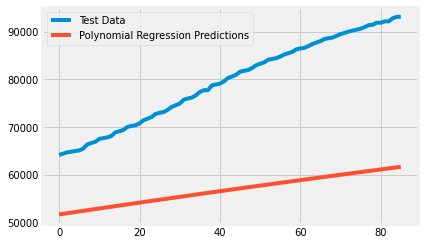

In [39]:
prediction(france_deaths)

MAE: 32670.773071842505
MSE: 1121980399.2525187
-11.796667450007288
          Date  Predicted number of Confirmed Cases
0   03/25/2021                              62063.0
1   03/26/2021                              62121.0
2   03/27/2021                              62178.0
3   03/28/2021                              62236.0
4   03/29/2021                              62292.0
5   03/30/2021                              62349.0
6   03/31/2021                              62405.0
7   04/01/2021                              62461.0
8   04/02/2021                              62516.0
9   04/03/2021                              62571.0
10  04/04/2021                              62625.0
11  04/05/2021                              62679.0
12  04/06/2021                              62733.0
13  04/07/2021                              62786.0
14  04/08/2021                              62839.0
15  04/09/2021                              62892.0
16  04/10/2021                              6294

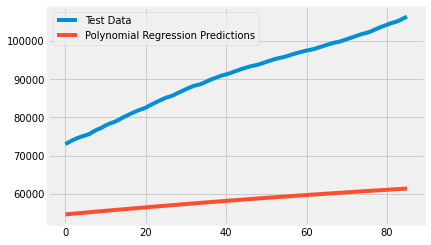

In [40]:
prediction(italy_deaths)

MAE: 1703.0014950911877
MSE: 3300336.693688066
-8498.538861891166
          Date  Predicted number of Confirmed Cases
0   03/25/2021                               1620.0
1   03/26/2021                               1587.0
2   03/27/2021                               1554.0
3   03/28/2021                               1520.0
4   03/29/2021                               1486.0
5   03/30/2021                               1453.0
6   03/31/2021                               1419.0
7   04/01/2021                               1385.0
8   04/02/2021                               1351.0
9   04/03/2021                               1316.0
10  04/04/2021                               1282.0
11  04/05/2021                               1247.0
12  04/06/2021                               1212.0
13  04/07/2021                               1177.0
14  04/08/2021                               1142.0
15  04/09/2021                               1107.0
16  04/10/2021                               1071.

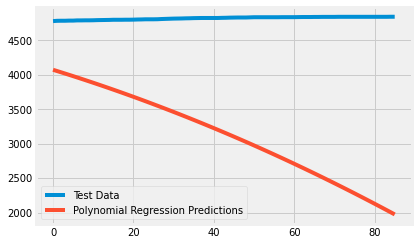

In [41]:
prediction(china_deaths)